# Import packages and read data 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use ("fivethirtyeight")


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
prd= pd.read_csv("/content/ratings_Beauty.csv")
prd.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


# product Recomendation based on popularity 

In [ ]:
prd_grp= pd.DataFrame(prd.groupby("ProductId")["Rating"].count())

In [ ]:
prd_grp.head(15)

,Rating
ProductId,
0205616461,1
0558925278,2
0733001998,1
0737104473,1
0762451459,1
1304139212,1
1304139220,1
130414089X,1
130414643X,3


In [ ]:
prd_grp1= prd_grp.sort_values("Rating", ascending=False)

In [ ]:
prd_grp1.head()

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088


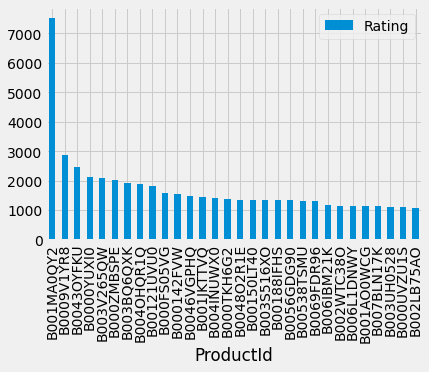

In [ ]:
prd_grp1.head(30).plot(kind="bar")

Most popular products is "B001MA0QY2" with above 7000 ratings. The next popular product is "B0009V1YR8" with 2869 ratings

#Product recomendation based on Collaborative filtering technique

In [ ]:
# Taking sample data for building model 
prd_grp2= prd.sample(frac=.01)

In [ ]:
prd_grp2.shape

(20231, 4)

In [ ]:
#build a matrix with products as index and users as columns 
matrix= prd_grp2.pivot_table("Rating", index="ProductId", columns="UserId", fill_value=0)

In [ ]:
matrix

UserId,A00416781KPR6K34DFDX8,A01290231HW9YARUTSI41,A014338896MBOX5BLUOF,A01720702S8VXTOFEVMJ5,A02155413BVL8D0G7X6DN,A02391153048PN2FHKWRK,A03194882L8Z9JVQNYFNL,A03364251DGXSGA9PSR99,A04057782IZB008QIRHRK,A04309042SDSL8YX2HRR7,A06094932WDZY3BSMNMU3,A0614215ICIJ7IVV472R,A06416351DA41FV2RIKHI,A06520532QB839YM3DVL0,A07254413LGXSME7TE81I,A08031782X03KZNKFTSMW,A08369723HPLPTPL83F7R,A0867911343O3GCLTMG9U,A091906237BTF6UBHYHGJ,A09312042Q1VYFD83WQ8Y,A099766128UI0NCS98N1E,A1004JWYU1K9L5,A10065SWIBYHPT,A100EGCQTXRU4S,A100WO06OQR8BQ,A100XPN72O4IPV,A1019XIYJSGYA5,A101JWI7HNCKGB,A10220YORA6MUU,A102GCNMKDR9NX,A102IZRKC111Q1,A102T50VTVYHU,A10313531TYMRJTVLE7Y1,A10325792C8HSYURRQALN,A10335JAGE1U25,A103HY817ZXVUG,A103MTBB6KNZEB,A103WXT3CHVY0H,A103XPBRWOIW50,A1047EDJ84IMAS,...,AZQ8YJISIWUNP,AZQGLRU5IK0LN,AZQJ85BTRUQV2,AZQJPYQYP6J2C,AZQVEM0EPYF7I,AZR4UV5NRPM7M,AZS4UNYSAZVG8,AZSB302FO4OZU,AZSGTLCCG48XG,AZSPXS4MIINXK,AZSSLLZTCVGZ8,AZSU606JD8WWN,AZT4LYMFX12YZ,AZTASH8WKRMN0,AZTZ7SIIRXLXE,AZU4XEUHOG0NA,AZUGBTPDS41N3,AZUQ3Q5PHYT26,AZV1504LFE244,AZVB3BEGVKIB1,AZVJ0E06QZCKW,AZVWPEM8C8QUR,AZW5D33LCYIIT,AZWDVM50CY5I8,AZWRBIOH5DQ7G,AZWUGAMPQ4T7A,AZWY2H5IX93AV,AZWY4Z49RWC4M,AZX1BHAYBNTGN,AZXED5SLFZS89,AZXNMJ57QAZ9N,AZY32NH4QO5IS,AZY3I5RDEDN9V,AZY8RW6L7W52Z,AZY96LU53VWGO,AZYJE40XW6MFG,AZZ4EGQY957CJ,AZZBMPY330P3I,AZZTC2OYVNE2Q,AZZVXO74W8OVC
ProductId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1304351475,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3227001381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5357955905,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6022600685,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6117043058,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B00L3LBUGI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
B00L5DI5K8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
B00L5JHZJO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
matrix.T.head()

ProductId,1304174867,1304351475,1304482634,1304651118,535795531X,7535842801,9746427962,978807278X,9788074995,9788077927,9788081053,9790773161,9790774443,979077480X,9790775288,9790783809,9790787707,9790789203,9790790341,9790790961,9790797710,9790798911,9790800916,B0000014DT,B000006A6H,B00004TMFE,B00004TUBL,B00004TUBV,B00004U9UY,B000050B6U,B000050B75,B000052WYD,B000052XEG,B000052XIA,B000052XW5,B000052XZP,B000052Y0S,B000052Y25,B000052Y2W,B000052YDH,...,B00JYY576U,B00JZGJ7FO,B00JZKWLQC,B00JZT9REM,B00K0VW30E,B00K2O3NV2,B00K4FD59E,B00K5B25KM,B00K6H2X8O,B00K6KBAK8,B00K6OZQZO,B00K7HH2AC,B00K7QZZCK,B00K86E9PI,B00KAB1TBI,B00KBIX8MS,B00KBR7W9Y,B00KCFAZTE,B00KD1QXA2,B00KDOV8DG,B00KEWQ5AI,B00KGO8XY0,B00KHGIK54,B00KHH2VOY,B00KJ1ASDY,B00KK62714,B00KMXQZC2,B00KNIL36E,B00KNIWVKG,B00KQVTX06,B00KS4V6OW,B00KTLBEEQ,B00KVP44DI,B00KWFDBKE,B00KYXSF00,B00L0GJOMS,B00L2J4ZP4,B00L3KEIZO,B00L5JHZJO,B00LCOGU8E
UserId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A00370223FX3K9TUF1QCL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A00700212KB3K0MVESPIY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A02227212BVIA0DTOZZTZ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A022899328A0QROR32DCT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A02552252VSFZ94G1R4SK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
matrix.shape

(14583, 19841)

In [ ]:
X=matrix.T


In [ ]:
X.shape
X


ProductId,1304174867,1304351475,1304482634,1304651118,535795531X,7535842801,9746427962,978807278X,9788074995,9788077927,9788081053,9790773161,9790774443,979077480X,9790775288,9790783809,9790787707,9790789203,9790790341,9790790961,9790797710,9790798911,9790800916,B0000014DT,B000006A6H,B00004TMFE,B00004TUBL,B00004TUBV,B00004U9UY,B000050B6U,B000050B75,B000052WYD,B000052XEG,B000052XIA,B000052XW5,B000052XZP,B000052Y0S,B000052Y25,B000052Y2W,B000052YDH,...,B00JYY576U,B00JZGJ7FO,B00JZKWLQC,B00JZT9REM,B00K0VW30E,B00K2O3NV2,B00K4FD59E,B00K5B25KM,B00K6H2X8O,B00K6KBAK8,B00K6OZQZO,B00K7HH2AC,B00K7QZZCK,B00K86E9PI,B00KAB1TBI,B00KBIX8MS,B00KBR7W9Y,B00KCFAZTE,B00KD1QXA2,B00KDOV8DG,B00KEWQ5AI,B00KGO8XY0,B00KHGIK54,B00KHH2VOY,B00KJ1ASDY,B00KK62714,B00KMXQZC2,B00KNIL36E,B00KNIWVKG,B00KQVTX06,B00KS4V6OW,B00KTLBEEQ,B00KVP44DI,B00KWFDBKE,B00KYXSF00,B00L0GJOMS,B00L2J4ZP4,B00L3KEIZO,B00L5JHZJO,B00LCOGU8E
UserId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A00370223FX3K9TUF1QCL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A00700212KB3K0MVESPIY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A02227212BVIA0DTOZZTZ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A022899328A0QROR32DCT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A02552252VSFZ94G1R4SK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZYPYVAD3KTJB,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AZYR51QTD6FAY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AZZ4TP7YYE252,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
#decompose matrix using SVD
SVD= TruncatedSVD(n_components=10)
dec_matrix=SVD.fit_transform(X)
dec_matrix.shape

(19841, 10)

In [ ]:
dec_matrix

array([[ 2.67154859e-10, -2.32383183e-07,  3.67059521e-08, ...,
        -3.73679408e-06, -1.44836578e-06, -1.17206809e-06],
       [-4.25464175e-14, -1.50263009e-11,  1.10520472e-11, ...,
        -1.33213689e-12,  5.81183466e-11,  1.04926548e-10],
       [-8.31054711e-13, -2.62817411e-08,  3.87689663e-08, ...,
        -4.86997615e-08, -2.10603507e-07, -8.27906918e-08],
       ...,
       [-2.40598217e-10,  3.50305039e-07, -3.14451537e-07, ...,
         1.17221283e-06,  3.90323032e-08,  3.40519930e-06],
       [-7.59707287e-10,  3.88912072e-08, -9.28252693e-07, ...,
         2.88643964e-06, -3.07561136e-07,  4.31418582e-07],
       [-1.93348066e-09,  1.81458605e-07, -1.09824332e-07, ...,
         1.16177642e-06,  2.39382629e-07,  2.04557215e-06]])

In [ ]:
# correlation coeffecient for decomposed matrix 
correlation = np.corrcoef(dec_matrix)
correlation.shape

(19824, 19824)

In [ ]:
correlation.T

array([[ 1.        , -0.00651532,  0.52462996, ..., -0.50531588,
        -0.67543593, -0.32833477],
       [-0.00651532,  1.        , -0.46481999, ...,  0.31347431,
        -0.20882673,  0.65843133],
       [ 0.52462996, -0.46481999,  1.        , ..., -0.26293906,
        -0.3260444 , -0.54190695],
       ...,
       [-0.50531588,  0.31347431, -0.26293906, ...,  1.        ,
         0.44688101,  0.29541877],
       [-0.67543593, -0.20882673, -0.3260444 , ...,  0.44688101,
         1.        ,  0.36444806],
       [-0.32833477,  0.65843133, -0.54190695, ...,  0.29541877,
         0.36444806,  1.        ]])

In [ ]:
#choose one product 
i="B00000G2HU"
product_names= list(X.index)
productId= product_names.index(i)

In [ ]:
productId

25

In [ ]:
correlation_productid= correlation[productId]
correlation_productid

array([ 0.09098002,  0.26187481, -0.19405625, ...,  0.6716955 ,
        0.0048573 , -0.88264785])

In [ ]:
correlation_productid.shape

(14706,)

In [ ]:
recomend= list(X.index[correlation_productid>.9])

In [ ]:
recomend[0:9]

['9790775288',
 'B00000G2HU',
 'B00004U9V2',
 'B0000530LO',
 'B00005IA52',
 'B0000UTUVU',
 'B00027DDOQ',
 'B0002YFQAS',
 'B0002Z8PJQ']

#Product recomendation based on item-item similarity

In [3]:
!pip install surprise

     |████████████████████████████████| 6.5MB 4.7MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1675724 sha256=3eb788dba7edd34af197f0b789a60675d4e99104fb87fe272affb04ed481e10c
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [19]:
#using movies data to recomend movies 
from scipy import stats
import ast
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Reader , Dataset, SVD
from surprise.model_selection import cross_validate 
from wordcloud import WordCloud

In [28]:
mov= pd.read_csv("/content/tmdb_5000_movies.csv")
mov.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [29]:
mov.shape

(4803, 20)

In [30]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

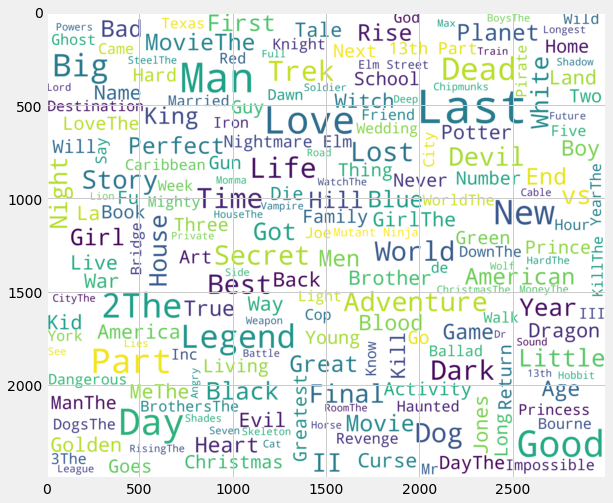

In [31]:
plt.figure(figsize=(12,8))
wordcloud=WordCloud(background_color="white", max_font_size=250, width=3000, height=2500).generate("".join (mov["title"]))
plt.imshow(wordcloud, interpolation="bilinear")


In [33]:
# combine keywords, convert to numerical format using countvectorizer/ngram/tfid vectorizer
mov["mov_kwrds"]= mov["genres"]+mov["keywords"]+mov["original_title"]
mov["mov_kwrds"]

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4798    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4799    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4800    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4801                                 [][]Shanghai Calling
4802    [{"id": 99, "name": "Documentary"}][{"id": 152...
Name: mov_kwrds, Length: 4803, dtype: object

In [13]:
mov

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,mov_kwrds
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlyw

In [34]:
#convert to numerical format using vectors 
count= CountVectorizer(analyzer="word", ngram_range=(1,2),stop_words="english")
#print (count)
count_matrix= count.fit_transform(mov["mov_kwrds"])
print (count_matrix)

  (0, 32691)	25
  (0, 13952)	1
  (0, 20077)	1
  (0, 1324)	1
  (0, 20205)	1
  (0, 1876)	1
  (0, 29243)	1
  (0, 19302)	1
  (0, 51974)	1
  (0, 29500)	1
  (0, 2060)	1
  (0, 25932)	1
  (0, 24630)	1
  (0, 14140)	1
  (0, 30413)	1
  (0, 14927)	1
  (0, 53443)	4
  (0, 57182)	2
  (0, 14945)	1
  (0, 24893)	1
  (0, 15401)	1
  (0, 53248)	1
  (0, 15515)	1
  (0, 55898)	1
  (0, 19690)	1
  :	:
  (4802, 2603)	1
  (4802, 47860)	1
  (4802, 27609)	1
  (4802, 30812)	1
  (4802, 26165)	1
  (4802, 19964)	1
  (4802, 42518)	1
  (4802, 19965)	1
  (4802, 19900)	1
  (4802, 27265)	1
  (4802, 42486)	1
  (4802, 19901)	1
  (4802, 27278)	1
  (4802, 12513)	1
  (4802, 23538)	1
  (4802, 38868)	1
  (4802, 12514)	1
  (4802, 23539)	1
  (4802, 910)	1
  (4802, 33136)	1
  (4802, 911)	1
  (4802, 27614)	1
  (4802, 27651)	1
  (4802, 30815)	1
  (4802, 26166)	1


In [35]:
# cal cosine similarity for values in vector
cos_sim=cosine_similarity(count_matrix,count_matrix)
cos_sim

array([[1.        , 0.8003571 , 0.72500507, ..., 0.70985408, 0.        ,
        0.60005377],
       [0.8003571 , 1.        , 0.71726065, ..., 0.68922535, 0.        ,
        0.58652033],
       [0.72500507, 0.71726065, 1.        , ..., 0.61729571, 0.        ,
        0.52807409],
       ...,
       [0.70985408, 0.68922535, 0.61729571, ..., 1.        , 0.        ,
        0.54197081],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.60005377, 0.58652033, 0.52807409, ..., 0.54197081, 0.        ,
        1.        ]])

In [36]:
indices= pd.Series(mov.index, index=mov["title"])
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [37]:
def recomendations (id,title) :
  idx= indices[title]
  sim_score= list(enumerate(cos_sim[int(idx)]))
  sim_score= sorted(sim_score, key=lambda x: x[1], reverse=False)
  print ( sim_score)
  sim_score= sim_score[1:10]
  mov_lst= [i[0] for i in sim_score]

  movies= mov.iloc[mov_lst][["title"]]
  movies=movies.sort_values("title", ascending=False)
  return (movies.head(10))

In [38]:
recomendations (0,"Avatar")

[(3971, 0.0), (3992, 0.0), (4068, 0.0), (4105, 0.0), (4118, 0.0), (4293, 0.0), (4314, 0.0), (4385, 0.0), (4400, 0.0), (4413, 0.0), (4458, 0.0), (4504, 0.0), (4550, 0.0), (4553, 0.0), (4562, 0.0), (4566, 0.0), (4569, 0.0), (4571, 0.0), (4611, 0.0), (4622, 0.0), (4633, 0.0), (4657, 0.0), (4674, 0.0), (4714, 0.0), (4716, 0.0), (4801, 0.0), (3103, 0.22980309714155567), (3432, 0.22980309714155567), (4581, 0.22980309714155567), (3888, 0.2468481239450951), (4389, 0.2468481239450951), (4524, 0.2468481239450951), (4737, 0.2468481239450951), (2256, 0.2567220489028989), (3228, 0.2567220489028989), (4468, 0.2665959738607027), (1673, 0.2683522027346235), (2427, 0.2683522027346235), (3781, 0.2683522027346235), (4009, 0.2683522027346235), (4027, 0.2683522027346235), (4269, 0.2683522027346235), (4419, 0.2683522027346235), (4600, 0.2683522027346235), (4665, 0.2683522027346235), (4771, 0.2683522027346235), (2601, 0.27908629084400843), (436, 0.2966745227120435), (1522, 0.2966745227120435), (1544, 0.29667

,title
4105,"The Book of Mormon Movie, Volume 1: The Journey"
4293,The Algerian
4400,Sparkler
4068,Sharkskin
3992,Sardaarji
4385,Lisa Picard Is Famous
4118,Hum To Mohabbat Karega
4314,Crowsnest
4413,Childless


In [40]:
recomendations (4,"John Carter")

[(3971, 0.0), (3992, 0.0), (4068, 0.0), (4105, 0.0), (4118, 0.0), (4293, 0.0), (4314, 0.0), (4385, 0.0), (4400, 0.0), (4413, 0.0), (4458, 0.0), (4504, 0.0), (4550, 0.0), (4553, 0.0), (4562, 0.0), (4566, 0.0), (4569, 0.0), (4571, 0.0), (4611, 0.0), (4622, 0.0), (4633, 0.0), (4657, 0.0), (4674, 0.0), (4714, 0.0), (4716, 0.0), (4801, 0.0), (3103, 0.22322066933590975), (3432, 0.22322066933590975), (4581, 0.22322066933590975), (3228, 0.2397774622567244), (3888, 0.2397774622567244), (4389, 0.2397774622567244), (4468, 0.2397774622567244), (4524, 0.2397774622567244), (4737, 0.2397774622567244), (2256, 0.25239732869128884), (1673, 0.2606655830895513), (2427, 0.2606655830895513), (3781, 0.2606655830895513), (4009, 0.2606655830895513), (4027, 0.2606655830895513), (4269, 0.2606655830895513), (4419, 0.2606655830895513), (4600, 0.2606655830895513), (4665, 0.2606655830895513), (4771, 0.2606655830895513), (2601, 0.27438482430479083), (436, 0.28817664495575035), (1522, 0.28817664495575035), (1544, 0.28

,title
4105,"The Book of Mormon Movie, Volume 1: The Journey"
4293,The Algerian
4400,Sparkler
4068,Sharkskin
3992,Sardaarji
4385,Lisa Picard Is Famous
4118,Hum To Mohabbat Karega
4314,Crowsnest
4413,Childless
